In [41]:
#load dataset
import pandas as pd
data = pd.read_csv("CC GENERAL.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [42]:
#preprocessing
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].median() , inplace =True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].median() , inplace =True)

In [43]:
#preprocessing
fittedData = list(data.columns)
filtredData = filter(lambda column:column != 'CUST_ID',list(data.columns))
filtredData = list(filtredData)
filtredData = data[filtredData]
filtredData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
# hierarchical clustring 
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(filtredData) 
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


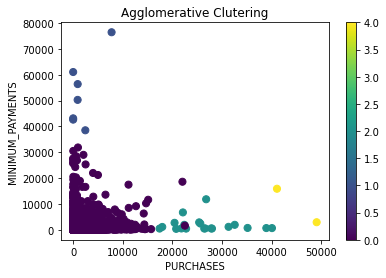

In [45]:
#plot agglo
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data['PURCHASES'] , data["MINIMUM_PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("MINIMUM_PAYMENTS")
plt.colorbar(scatter)

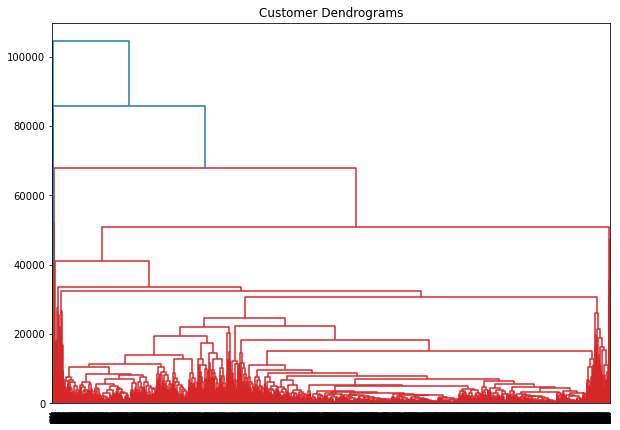

In [46]:
#dendo with hierarchical
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(filtredData, method="complete"))

In [49]:
# init model Kmeans
from sklearn.cluster import KMeans

def kmeans_clustring(k):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(filtredData)
    labels=pd.DataFrame(kmeans.labels_)
    print(labels)
    kmeans.predict(filtredData)
    print(kmeans.cluster_centers_)
    return [kmeans.labels_,kmeans.cluster_centers_]

#test kmeans with k=5
dataKmeans =  kmeans_clustring(5)
    

      0
0     0
1     3
2     4
3     4
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]
[[8.36638557e+02 8.52450540e-01 5.13646260e+02 2.50798678e+02
  2.63139567e+02 5.18993150e+02 4.51231569e-01 1.33100385e-01
  3.45502805e-01 1.12878342e-01 2.39031239e+00 9.61705862e+00
  2.31332700e+03 9.21209431e+02 5.16973504e+02 1.46055098e-01
  1.13832924e+01]
 [4.74238647e+03 9.26988635e-01 1.34554481e+04 9.59629156e+03
  3.85938573e+03 3.81121966e+03 8.41761344e-01 6.89599125e-01
  6.80681823e-01 1.55066260e-01 7.04166667e+00 1.00354167e+02
  1.30364583e+04 1.90446534e+04 2.57972783e+03 3.85151708e-01
  1.19583333e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [6.06634064e+03 9.62583360e-01 1.11589292e+03 6.54209546e+02
  4.61772764e+02 4.

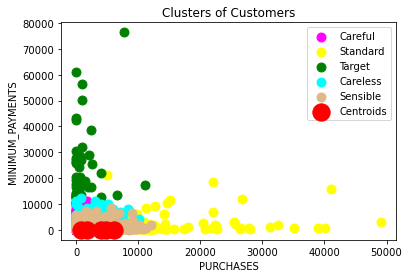

In [52]:
def plotkmeans(dataKmeans):
    plt.scatter(data["PURCHASES"][dataKmeans[0] == 0],          
    data["MINIMUM_PAYMENTS"][dataKmeans[0] == 0],s=80,c='magenta',label='Careful')
    plt.scatter(data["PURCHASES"][dataKmeans[0] == 1],          
    data["MINIMUM_PAYMENTS"][dataKmeans[0] == 1],s=80,c='yellow',label='Standard')
    plt.scatter(data["PURCHASES"][dataKmeans[0] == 2],          
    data["MINIMUM_PAYMENTS"][dataKmeans[0] == 2],s=80,c='green',label='Target')
    plt.scatter(data["PURCHASES"][dataKmeans[0] == 3],          
    data["MINIMUM_PAYMENTS"][dataKmeans[0] == 3],s=80,c='cyan',label='Careless')
    plt.scatter(data["PURCHASES"][dataKmeans[0] == 4],          
    data["MINIMUM_PAYMENTS"][dataKmeans[0] == 4],s=80,c='burlywood',label='Sensible')
    plt.scatter(dataKmeans[1][:, 0], dataKmeans[1][:, 1], s=300, c='red', label = 'Centroids')
    plt.title('Clusters of Customers')
    plt.xlabel('PURCHASES')
    plt.ylabel('MINIMUM_PAYMENTS')
    plt.legend()
    plt.show()
    
    
plotkmeans(dataKmeans)

      0
0     0
1     9
2     6
3     6
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]
[[ 7.61675377e+02  8.48586474e-01  4.71326263e+02  2.23958014e+02
   2.47588119e+02  4.24314049e+02  4.45241754e-01  1.22466904e-01
   3.44004709e-01  1.06461265e-01  2.14761041e+00  9.00201654e+00
   2.03030259e+03  8.14335528e+02  4.70590554e+02  1.41591963e-01
   1.13508772e+01]
 [ 1.60217004e+03  8.79206844e-01  1.57062605e+03  9.86107479e+02
   5.84623269e+02  4.10933512e+02  6.51211744e-01  4.02695677e-01
   4.35239769e-01  6.52053718e-02  1.20085470e+00  2.13910256e+01
   1.22834402e+04  2.02031633e+03  5.02770034e+02  2.69162085e-01
   1.17585470e+01]
 [ 5.44820172e+03  9.56126478e-01  2.79165557e+04  2.23543143e+04
   5.56224130e+03  9.70110470e+02  9.05072435e-01  8.50000043e-01
   7.08695609e-01  3.98550435e-02  1.78260870e+00  1.28217391e+02
   1.60434783e+04  2.77616004e+04  3.34571825e+03  5.15316174e-01
   1.19130435e+01]
 [ 8.14981703e+03  9.90393031e

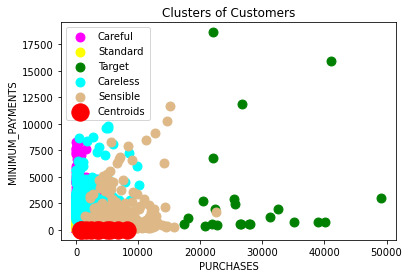

In [53]:
#test kmeans with k = 10
dataKmeans =  kmeans_clustring(10)
plotkmeans(dataKmeans)